In [1]:
#Name : Priyanshu Mahukhaye
#Roll : 43341

# **Problem Statement 1**


Feedforward Neural Network

Implementing Feedforward neural networks with Keras and Tensorflow for classification of handwritten MNIST dataset using below steps



```
a. import the necessary packages
b. Load the training and testing dataset
c. Define the network architecture using Keras
d. Train the model using SGD with 11 epochs
e. Evaluate the network
f. Plot the training loss and accuracy
```



## **Import the necessary packages**

In [2]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K


import matplotlib.pyplot as plt
import numpy as np

## **Load training and testing data**

In [3]:
((X_train, Y_train), (X_test, Y_test)) = mnist.load_data()

In [4]:
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

X_train = X_train/255.0
X_test = X_test/255.0

In [5]:
lb = LabelBinarizer()

In [6]:
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

## **Defining network architecture using Keras**

In [7]:
model = Sequential()
model.add(Dense(128, input_shape =(784,), activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

## **Train the model using SGD with 11 epochs**

In [8]:
sgd = SGD(0.01)
epochs = 11
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=128)

Epoch 1/11
469/469 [==============================] - 2s 3ms/step - loss: 2.3046 - accuracy: 0.1371 - val_loss: 2.2650 - val_accuracy: 0.2871
Epoch 2/11
469/469 [==============================] - 1s 2ms/step - loss: 2.2439 - accuracy: 0.2979 - val_loss: 2.2173 - val_accuracy: 0.3312
Epoch 3/11
469/469 [==============================] - 1s 2ms/step - loss: 2.1901 - accuracy: 0.4279 - val_loss: 2.1531 - val_accuracy: 0.5112
Epoch 4/11
469/469 [==============================] - 1s 2ms/step - loss: 2.1141 - accuracy: 0.5276 - val_loss: 2.0608 - val_accuracy: 0.5511
Epoch 5/11
469/469 [==============================] - 1s 2ms/step - loss: 2.0035 - accuracy: 0.5781 - val_loss: 1.9268 - val_accuracy: 0.6357
Epoch 6/11
469/469 [==============================] - 1s 2ms/step - loss: 1.8507 - accuracy: 0.6252 - val_loss: 1.7525 - val_accuracy: 0.6424
Epoch 7/11
469/469 [==============================] - 1s 2ms/step - loss: 1.6676 - accuracy: 0.6512 - val_loss: 1.5621 - val_accuracy: 0.6581
Epoch 

## **Evaluate Network**

In [9]:
predictions = model.predict(X_test, batch_size=128)
print(classification_report(Y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=[str(x) for x in lb.classes_]))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       980
           1       0.78      0.99      0.87      1135
           2       0.78      0.68      0.73      1032
           3       0.68      0.85      0.75      1010
           4       0.70      0.90      0.79       982
           5       0.86      0.41      0.55       892
           6       0.84      0.90      0.87       958
           7       0.70      0.88      0.78      1028
           8       0.81      0.56      0.67       974
           9       0.83      0.46      0.59      1009

    accuracy                           0.76     10000
   macro avg       0.78      0.76      0.75     10000
weighted avg       0.78      0.76      0.75     10000



## **Plot Training Loss and Accuracy**

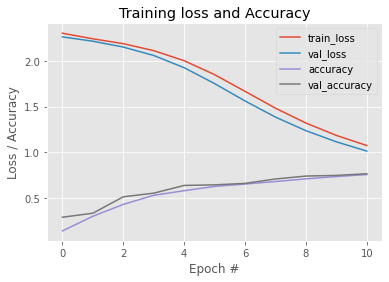

In [10]:
plt.style.use("ggplot")
plt.figure()

plt.plot(np.arange(0, epochs), H.history['loss'], label="train_loss")
plt.plot(np.arange(0, epochs), H.history['val_loss'], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="accuracy")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_accuracy")


plt.title("Training loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss / Accuracy")
plt.legend()
plt.show()